<a href="https://colab.research.google.com/github/binacserai/HGC/blob/main/Copy_of_Density_Based_Spatial_Clustering_of_Applications_with_Noise_(DBSCAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mounting the drive to collabnotebook


In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


Import necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Load the dataset:

In [3]:
path="/content/drive/MyDrive/Colab Notebooks/GSE20347_Disease.csv"
data=pd.read_csv(path)
data.describe

<bound method NDFrame.describe of                 ID_REF       GSM509804       GSM509805     GSM509806  \
0            1007_s_at  1,07,09,83,569  1,00,04,21,244  10,69,52,201   
1              1053_at    59,08,91,136    84,39,42,751  67,09,31,228   
2               117_at     5,46,67,073    60,00,65,731  51,24,23,033   
3               121_at    76,00,79,693    77,78,69,562  77,56,23,609   
4            1255_g_at    37,06,62,243    38,20,55,898  36,94,93,988   
...                ...             ...             ...           ...   
22272   AFFX-ThrX-5_at    50,84,02,303    61,24,80,742  49,93,50,921   
22273   AFFX-ThrX-M_at     6,08,88,339    73,37,33,465  65,93,62,215   
22274  AFFX-TrpnX-3_at     3,37,84,169    33,12,40,883   3,31,56,243   
22275  AFFX-TrpnX-5_at    35,63,71,807     3,78,19,294   3,66,50,342   
22276  AFFX-TrpnX-M_at    34,11,37,208    35,18,75,842  34,94,88,935   

          GSM509807     GSM509808     GSM509809       GSM509810  \
0      11,29,46,999  10,41,06,293  10,29,30,073  1,04,82,16,682   
1      81,49,00,208  64,87,22,473  64,63,27,088    71,20,04,735   
2       4,97,52,578  51,82,25,508  56,83,68,763    55,75,68,938   
3      78,42,75,077  80,16,42,825  78,52,29,197    78,13,08,785   
4      35,60,89,256  38,98,47,765  37,13,55,554    37,84,29,755   
...             ...           ...           ...             ...   
22272  52,26,38,035   5,78,93,447  60,34,98,143    44,70,89,764   
22273  59,42,70,278  68,77,82,471  74,13,54,866    47,49,20,363   
22274  34,58,62,188  33,39,06,077  34,21,78,089    33,82,17,873   
22275  36,21,64,487  36,49,98,187  36,87,16,549    37,43,89,703   
22276  34,88,35,201  34,10,19,061  35,46,46,584    34,37,54,213   

            GSM509811       GSM509812     GSM509813       GSM509814  \
0      1,07,54,79,274  1,05,36,23,259  10,32,60,596  1,07,56,19,598   
1        78,44,63,586    75,60,21,455  69,78,26,206    73,78,49,533   
2         5,36,27,081    53,53,53,928  60,73,99,762    50,90,00,846   
3        73,54,89,399    67,74,28,358  68,16,67,848    72,32,21,798   
4        37,29,13,078    38,04,75,885  37,55,98,471    36,09,85,837   
...               ...             ...           ...             ...   
22272    51,90,19,903    69,52,27,999  52,35,39,052    44,17,44,384   
22273    63,72,20,806    85,79,11,181  66,53,99,674    50,90,08,415   
22274    33,72,51,684    32,74,10,487  34,25,43,495    34,37,66,341   
22275     3,53,64,836    36,61,30,109   3,74,39,969     3,56,11,327   
22276    33,74,71,103    34,10,78,674  33,79,65,434    34,78,22,956   

            GSM509815     GSM509816       GSM509817     GSM509818  \
0      1,04,75,74,402  10,24,94,503  1,07,27,81,653  10,41,73,687   
1        75,10,84,993  76,53,31,672    80,59,49,182  73,61,37,425   
2        54,15,51,315  47,98,80,108    59,74,50,715  50,02,11,154   
3        73,06,43,074   7,24,75,255    68,06,85,609  70,45,39,901   
4        36,17,24,986  35,11,55,855    36,99,70,455  36,02,21,576   
...               ...           ...             ...           ...   
22272    66,91,39,593  54,10,58,596    54,30,26,502   4,27,29,264   
22273    83,99,96,774  70,27,35,615     6,94,85,681  45,11,47,434   
22274    34,88,77,714  33,49,16,636    32,95,00,461  34,14,58,781   
22275    36,98,98,021  36,23,72,562    36,01,92,453   3,49,97,108   
22276    34,30,51,793  34,53,27,897    33,38,97,109  34,65,57,361   

          GSM509819     GSM509820  
0      99,93,20,433  10,41,95,839  
1      81,81,84,525  87,43,81,543  
2         51,31,773  47,86,82,582  
3      71,67,94,711   7,19,72,336  
4      37,11,90,271  36,90,96,004  
...             ...           ...  
22272   4,86,56,996  53,47,64,085  
22273  61,41,16,804  69,40,63,643  
22274   3,33,78,223  33,87,88,158  
22275  35,98,89,971  34,53,96,202  
22276  34,11,22,115  34,07,94,849  

[22277 rows x 18 columns]>

Checking Null values

In [4]:
# Check if there are any null values in the entire DataFrame
any_null_values = data.isnull().sum().any()

if any_null_values:
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")


There are no null values in the DataFrame.


# Data Preprocessing
# Assuming 'ID_REF' column contains unique identifiers and is not used for clustering

In [5]:
data_numeric = data.drop('ID_REF', axis=1)
data_numeric = data_numeric.replace(',', '', regex=True).astype(float)
data_numeric = data_numeric.fillna(data_numeric.mean())


Visualize Clusters (Optional):

# Apply PCA to reduce dimensionality

Explained Variance Ratio:
[0.51116459 0.03558116 0.033795   0.032718   0.03164914 0.03128548
 0.03088751 0.03038966 0.03017559 0.02978902 0.02975781 0.02964107
 0.02935016 0.02906708 0.02903416 0.02806045 0.02765412]


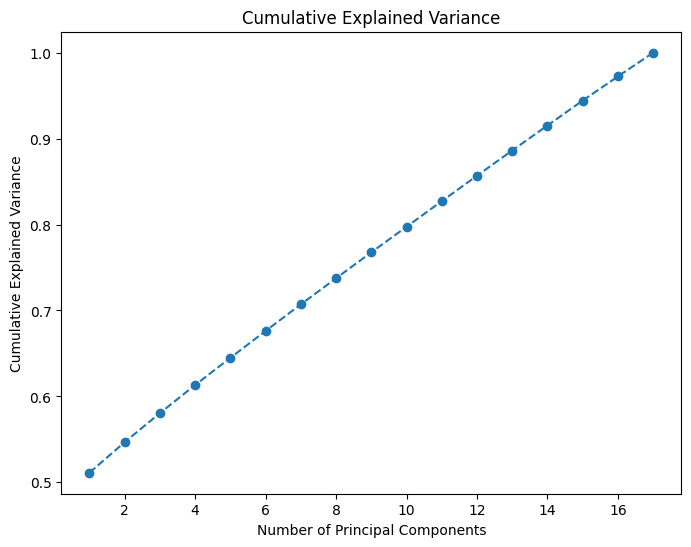

In [6]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_numeric is already prepared
# Apply PCA with the desired number of components (e.g., 17)
pca = PCA(n_components=17)
data_pca = pca.fit_transform(data_numeric)

# Create a DataFrame with the principal components
columns_pca = [f'PC{i+1}' for i in range(data_pca.shape[1])]
data_pca_df = pd.DataFrame(data_pca, columns=columns_pca)

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [7]:
# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Identify the most significant component
most_significant_component = np.argmax(explained_variance_ratio) + 1  # Adding 1 to convert from zero-based indexing
print(f"The most significant component is PC{most_significant_component} with explained variance ratio: {explained_variance_ratio[most_significant_component - 1]:.4f}")


Explained Variance Ratio:
[0.51116459 0.03558116 0.033795   0.032718   0.03164914 0.03128548
 0.03088751 0.03038966 0.03017559 0.02978902 0.02975781 0.02964107
 0.02935016 0.02906708 0.02903416 0.02806045 0.02765412]
The most significant component is PC1 with explained variance ratio: 0.5112


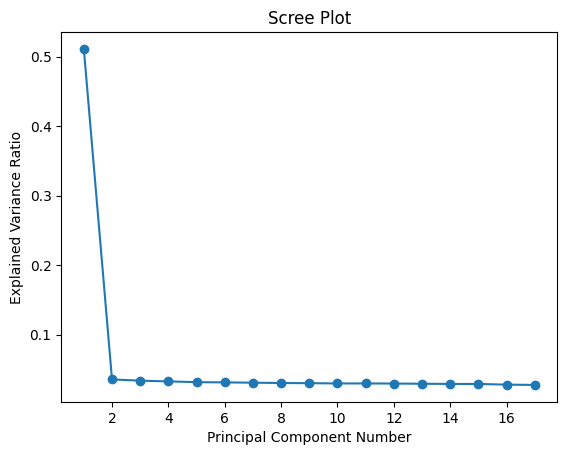

In [8]:
import matplotlib.pyplot as plt

# Assume explained_variance_ratio contains the explained variance ratio for each PC

# Plot the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.show()


   eps  num_clusters  silhouette_score
0  0.2            12          0.383167


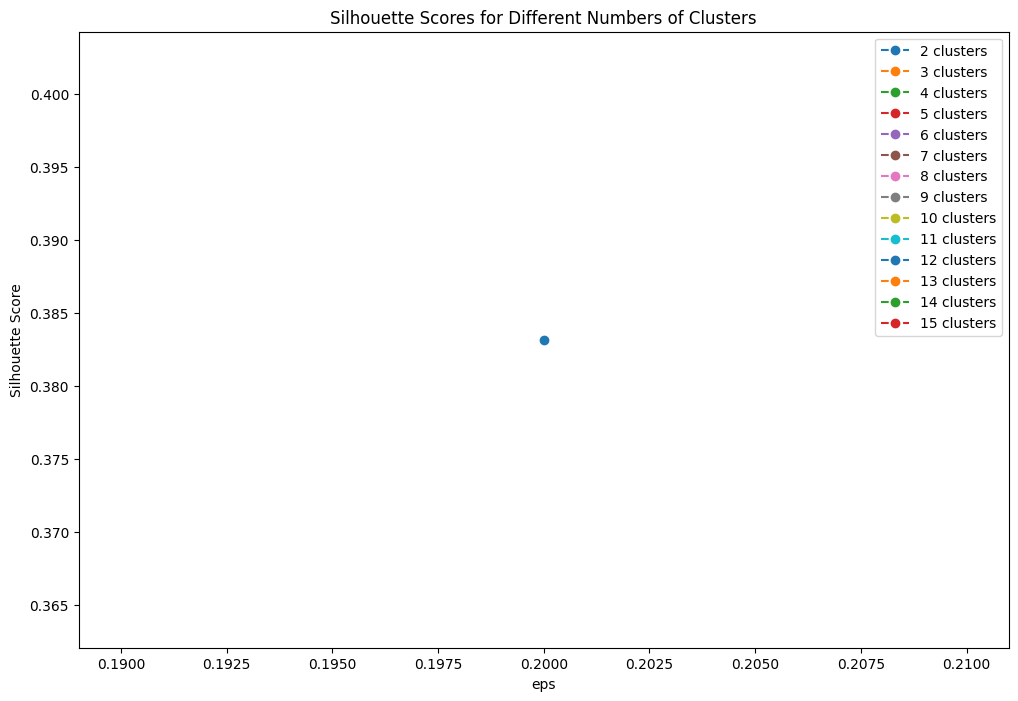

Best eps: 0.2
Best number of clusters: 12.0
Best silhouette score: 0.3831671606877126
Cluster counts:
-1       135
 0     22068
 1        10
 2         9
 3         7
 4         5
 5         7
 6        10
 7         6
 8         6
 9         5
 10        5
 11        4
Name: count, dtype: int64


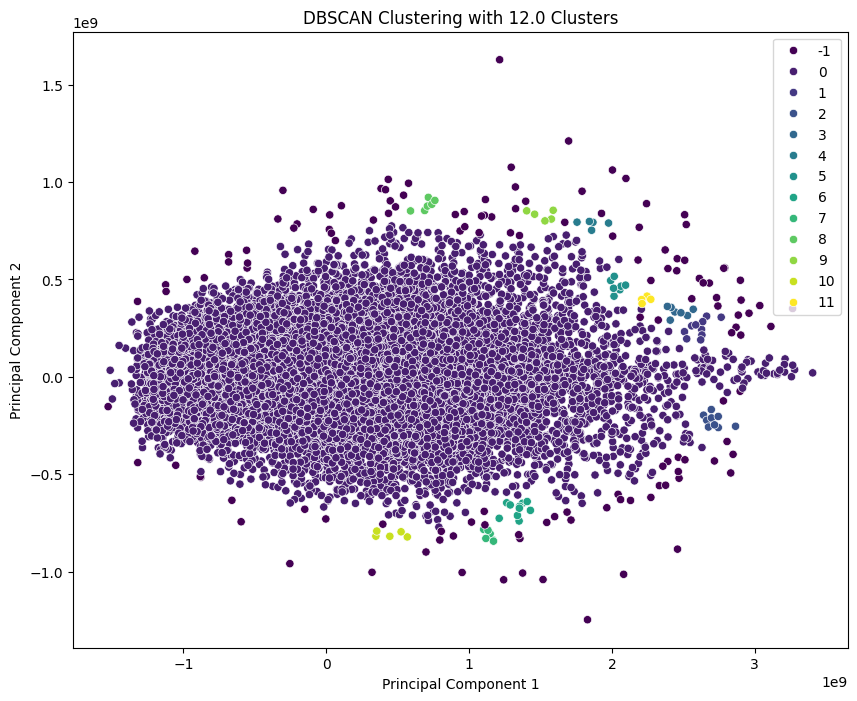

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd


# Scaling the data (important for clustering)
scaler = StandardScaler()
subset_data_scaled = scaler.fit_transform(data_pca[:, :2])

# Function to apply DBSCAN and return the number of clusters
def get_clusters(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(subset_data_scaled)
    num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    return cluster_labels, num_clusters

# Desired range of clusters
min_clusters = 2
max_clusters = 15

# Search for the optimal eps values
eps_values = np.linspace(0.1, 5.0, 50)  # Adjust this range based on your data
min_samples = 5

# Create lists to store the results
results = []
for eps in eps_values:
    cluster_labels, num_clusters = get_clusters(eps, min_samples)
    if min_clusters <= num_clusters <= max_clusters:
        silhouette_avg = silhouette_score(subset_data_scaled, cluster_labels)
        results.append((eps, num_clusters, silhouette_avg))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['eps', 'num_clusters', 'silhouette_score'])

# Display the results
print(results_df)

# Plot the silhouette scores for different numbers of clusters
plt.figure(figsize=(12, 8))
for n_clusters in range(min_clusters, max_clusters + 1):
    subset = results_df[results_df['num_clusters'] == n_clusters]
    plt.plot(subset['eps'], subset['silhouette_score'], marker='o', linestyle='--', label=f'{n_clusters} clusters')

plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Select the best result
best_result = results_df.loc[results_df['silhouette_score'].idxmax()]
best_eps = best_result['eps']
best_num_clusters = best_result['num_clusters']
best_silhouette_score = best_result['silhouette_score']

print(f"Best eps: {best_eps}")
print(f"Best number of clusters: {best_num_clusters}")
print(f"Best silhouette score: {best_silhouette_score}")

# Apply DBSCAN with the best eps
best_cluster_labels, _ = get_clusters(best_eps, min_samples)
data['Cluster'] = best_cluster_labels

# Display the number of elements in each cluster
cluster_counts = pd.Series(best_cluster_labels).value_counts().sort_index()
print("Cluster counts:")
print(cluster_counts)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=best_cluster_labels, palette='viridis', legend='full')
plt.title(f"DBSCAN Clustering with {best_num_clusters} Clusters")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()